# Evaluation of the clustering algorithm

In [31]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
from gatenlp import Document

## Loading the datasets

### Zeshel

In [32]:
from zeshel.to_gatenlp import read_docs

zeshel_train = read_docs('train')
zeshel_val = read_docs('val')
zeshel_test = read_docs('test')

ModuleNotFoundError: No module named 'zeshel.to_gatenlp'; 'zeshel' is not a package

In [121]:
sample_gdoc = zeshel_test['B510A83844DFB0DA']
sample_gdoc

Document(David Takemura David A . Takemura is a ( VFX ) artist , coordinator and supervisor who worked on , , , , and . He was also the visual effects supervisor for . His work on " Star Trek " earned Takemura two Emmy Award wins ( both of which were in 1992 ) , along with an additional three nominations , complemented by a Visual Effects Society Award in 2005 . A graduate of the University of Southern California , with a Bachelor ' s degree in Business Administration ( Marketing / Advertising ) , David Takemura ' s career took on an entirely different path , when he " " heard that they were in pre - production for the Star Trek : The Next Generation pilot episode . After interviewing with Bob Justman , I became one of the two production assistants " [ the other being Dana White ] " that started with the show that first season . Most of our responsibilities revolved around the office : answering phones , copying scripts , getting lunches , etc . " " His position on the new show was Takemura ' s first jobafter graduation . When the first season went into full swing , Peter Lauritson promoted him to post - production assistant / visual effects associate and assigned him to the two teams of Gary Hutzel / Robert Legato and Dan Curry / Ronald B . Moore , where he was able to learn the tricks of the trade . " " David worked with both teams in various capacities and was instrumental in making it all happen " " , an appreciative Curry stated . ( " Cinefantastique " , Vol 23 , # 5 , p . 62 ) Takemura ' s opportunity for advancement came when " Deep Space Nine " went into production in 1993 . The visual effects team of Hutzel and Legato were assigned to the new production , and , in order to fill the gap left behind by their departure for the remaining two seasons of " The Next Generation " , David Stipes , with whom Takemura was paired , was hired as visual effects supervisor and Takemura was promoted to visual effects coordinator . Upon the conclusion of the sixth season of " The Next Generation " , Takemura transferred to " Deep Space Nine " to start working on that series ' second season , where he was paired up with Glenn Neufeld in the same position . During the fourth season of that series , Takemura was given the opportunity to flex his muscles as visual effects supervisor on two early episodes , and , a position he was permanently promoted into at the end of that season , and which he held for the remainder of his tenure at the franchise . David Takemura was one of the few senior visual effects staffers of the television franchise who was also given a chance to serve as such on one of the . In Takemura ' s case it was , after Ron B . Moore declined the offer , where he served as the visual effects supervisor responsible for the scenes of the Borg torpedo attack on the town , the corridor phaser fight with the Borg , Geordi - Vision and Geordi ' s bionic eyes , the 1940s holodeck , and the landing of the Vulcan Ship at the end of the movie . Takemura , like Ron B . Moore , was one of the very few " Star Trek " staffers in any function ( including , amongst others , Rick Berman , Peter Lauritson and Michael Okuda ) , to have officially served for the full eighteen years of the " Berman era " of the television franchise ; but also having worked on " all " its series at one time or another , unlike Moore who missed out on " Deep Space Nine " . His name appeared in an okudagram reference in the second season episode , where he was listed as a noted comedian . He later had an explosive , Takemurium lite , named after him in an okudagram in the fourth season episode , as well as a noted doctor , a Starfleet officer , and D . Takemura whose names can be seen in various episodes . In he and John Knoll were interviewed by Larry Nemecek for the article " Light & Magic " in the " " . After an absence of twelve years , Takemura rejoined the " Star Trek " television franchise in 2017 in a senior VFX position , that of ( Senior ) Visual Effec

### MedMentions

In [4]:
from MedMentions.to_gatenlp import read_docs

mm_docs = read_docs()

  0%|          | 0/4393 [00:00<?, ?it/s]

In [5]:
mm_docs[0]

Document(DCTN4 as a modifier of chronic Pseudomonas aeruginosa infection in cystic fibrosis
Pseudomonas aeruginosa (Pa) infection in cystic fibrosis (CF) patients is associated with worse long-term pulmonary disease and shorter survival, and chronic Pa infection (CPA) is associated with reduced lung function, faster rate of lung decline, increased rates of exacerbations and shorter survival. By using exome sequencing and extreme phenotype design, it was recently shown that isoforms of dynactin 4 (DCTN4) may influence Pa infection in CF, leading to worse respiratory disease. The purpose of this study was to investigate the role of DCTN4 missense variants on Pa infection incidence, age at first Pa infection and chronic Pa infection incidence in a cohort of adult CF patients from a single centre. Polymerase chain reaction and direct sequencing were used to screen DNA samples for DCTN4 variants. A total of 121 adult CF patients from the Cochin Hospital CF centre have been included, all of them carrying two CFTR defects: 103 developed at least 1 pulmonary infection with Pa, and 68 patients of them had CPA. DCTN4 variants were identified in 24% (29/121) CF patients with Pa infection and in only 17% (3/18) CF patients with no Pa infection. Of the patients with CPA, 29% (20/68) had DCTN4 missense variants vs 23% (8/35) in patients without CPA. Interestingly, p.Tyr263Cys tend to be more frequently observed in CF patients with CPA than in patients without CPA (4/68 vs 0/35), and DCTN4 missense variants tend to be more frequent in male CF patients with CPA bearing two class II mutations than in male CF patients without CPA bearing two class II mutations (P = 0.06). Our observations reinforce that DCTN4 missense variants, especially p.Tyr263Cys, may be involved in the pathogenesis of CPA in male CF.
,features=Features({}),anns={'Gold': AnnotationSet([Annotation(0,5,T116,T123,features=Features({'mention': 'DCTN4', 'entity_id': 'C4308010'}),id=0), Annotation(23,63,T047,features=Features({'mention': 'chronic Pseudomonas aeruginosa infection', 'entity_id': 'C0854135'}),id=1), Annotation(67,82,T047,features=Features({'mention': 'cystic fibrosis', 'entity_id': 'C0010674'}),id=2), Annotation(83,120,T047,features=Features({'mention': 'Pseudomonas aeruginosa (Pa) infection', 'entity_id': 'C0854135'}),id=3), Annotation(124,139,T047,features=Features({'mention': 'cystic fibrosis', 'entity_id': 'C0010674'}),id=4), Annotation(141,143,T047,features=Features({'mention': 'CF', 'entity_id': 'C0010674'}),id=5), Annotation(145,153,T101,features=Features({'mention': 'patients', 'entity_id': 'C0030705'}),id=6), Annotation(179,188,T079,features=Features({'mention': 'long-term', 'entity_id': 'C0443252'}),id=7), Annotation(189,206,T047,features=Features({'mention': 'pulmonary disease', 'entity_id': 'C0024115'}),id=8), Annotation(211,227,T169,features=Features({'mention': 'shorter survival', 'entity_id': 'C0220921'}),id=9), Annotation(233,253,T047,features=Features({'mention': 'chronic Pa infection', 'entity_id': 'C0854135'}),id=10), Annotation(255,258,T047,features=Features({'mention': 'CPA', 'entity_id': 'C0854135'}),id=11), Annotation(279,300,T033,features=Features({'mention': 'reduced lung function', 'entity_id': 'C0847557'}),id=12), Annotation(302,329,T033,features=Features({'mention': 'faster rate of lung decline', 'entity_id': 'C3160731'}),id=13), Annotation(341,346,T081,features=Features({'mention': 'rates', 'entity_id': 'C1521828'}),id=14), Annotation(350,363,T033,features=Features({'mention': 'exacerbations', 'entity_id': 'C4086268'}),id=15), Annotation(368,384,T169,features=Features({'mention': 'shorter survival', 'entity_id': 'C0220921'}),id=16), Annotation(395,411,T063,features=Features({'mention': 'exome sequencing', 'entity_id': 'C3640077'}),id=17), Annotation(416,440,T052,features=Features({'mention': 'extreme phenotype design', 'entity_id': 'C1707689'}),id=18), Annotation(469,477,T116,features=Features({'mention': 'isoforms', 'entity_id': 'C05972

### Citeseer

In [11]:
# Don't know if we can use citeseer, it's only a dataset of linked articles based on a set of words contained in the articles

### AIDA

In [ ]:
from datasets import load_dataset

aida = load_dataset('cyanic-selkie/aida-conll-yago-wikidata')

In [23]:
from gatenlp import Document
from tqdm.auto import tqdm

def read_doc(x):
    doc = Document(x['text'])
    annset = doc.annset("Gold")

    for men in x['entities']:
        annset.add(
            start=men['start'],
            end=men['end'],
            anntype=men['tag'],
            features={
                'qid': men['qid'],
                'pageid': men['pageid']
            }
        )
    
    return doc

def read_docs(split):
    gdocs = [read_doc(x) for x in tqdm(aida[split])]

    return gdocs

In [26]:
aida_docs = read_docs('test')

  0%|          | 0/231 [00:00<?, ?it/s]

In [27]:
aida_docs[0]

Document(SOCCER - JAPAN GET LUCKY WIN , CHINA IN SURPRISE DEFEAT . Nadim Ladki AL-AIN , United Arab Emirates 1996-12-06 Japan began the defence of their Asian Cup title with a lucky 2-1 win against Syria in a Group C championship match on Friday . But China saw their luck desert them in the second match of the group , crashing to a surprise 2-0 defeat to newcomers Uzbekistan . China controlled most of the match and saw several chances missed until the 78th minute when Uzbek striker Igor Shkvyrin took advantage of a misdirected defensive header to lob the ball over the advancing Chinese keeper and into an empty net . Oleg Shatskiku made sure of the win in injury time , hitting an unstoppable left foot shot from just outside the area . The former Soviet republic was playing in an Asian Cup finals tie for the first time . Despite winning the Asian Games title two years ago , Uzbekistan are in the finals as outsiders . Two goals from defensive errors in the last six minutes allowed Japan to come from behind and collect all three points from their opening meeting against Syria . Takuya Takagi scored the winner in the 88th minute , rising to head a Hiroshige Yanagimoto cross towards the Syrian goal which goalkeeper Salem Bitar appeared to have covered but then allowed to slip into the net . It was the second costly blunder by Syria in four minutes . Defender Hassan Abbas rose to intercept a long ball into the area in the 84th minute but only managed to divert it into the top corner of Bitar 's goal . Nader Jokhadar had given Syria the lead with a well-struck header in the seventh minute . Japan then laid siege to the Syrian penalty area for most of the game but rarely breached the Syrian defence . Bitar pulled off fine saves whenever they did . Japan coach Shu Kamo said : ' ' The Syrian own goal proved lucky for us . The Syrians scored early and then played defensively and adopted long balls which made it hard for us . ' ' Japan , co-hosts of the World Cup in 2002 and ranked 20th in the world by FIFA , are favourites to regain their title here . Hosts UAE play Kuwait and South Korea take on Indonesia on Saturday in Group A matches . All four teams are level with one point each from one game .,features=Features({}),anns={'Gold': AnnotationSet([Annotation(9,14,LOC,features=Features({'qid': 170566, 'pageid': 993546}),id=0), Annotation(31,36,PER,features=Features({'qid': 130582, 'pageid': 39991568}),id=1), Annotation(58,69,PER,features=Features({'qid': None, 'pageid': None}),id=2), Annotation(70,76,LOC,features=Features({'qid': 234600, 'pageid': 212131}),id=3), Annotation(79,99,LOC,features=Features({'qid': 878, 'pageid': 69328}),id=4), Annotation(111,116,LOC,features=Features({'qid': 170566, 'pageid': 993546}),id=5), Annotation(144,153,MISC,features=Features({'qid': 369539, 'pageid': 1013464}),id=6), Annotation(189,194,LOC,features=Features({'qid': 272097, 'pageid': 1131669}),id=7), Annotation(243,248,LOC,features=Features({'qid': 130582, 'pageid': 39991568}),id=8), Annotation(358,368,LOC,features=Features({'qid': 487321, 'pageid': 1032413}),id=9), Annotation(371,376,LOC,features=Features({'qid': 130582, 'pageid': 39991568}),id=10), Annotation(464,469,MISC,features=Features({'qid': 487321, 'pageid': 1032413}),id=11), Annotation(478,491,PER,features=Features({'qid': 1659177, 'pageid': 12394021}),id=12), Annotation(576,583,MISC,features=Features({'qid': 148, 'pageid': 33151668}),id=13), Annotation(615,629,PER,features=Features({'qid': None, 'pageid': None}),id=14), Annotation(746,752,MISC,features=Features({'qid': 15180, 'pageid': 26779}),id=15), Annotation(780,789,MISC,features=Features({'qid': 157894, 'pageid': 250683}),id=16), Annotation(842,853,MISC,features=Features({'qid': 729592, 'pageid': 3285394}),id=17), Annotation(876,886,LOC,features=Features({'qid': 487321, 'pageid': 1032413}),id=18), Annotation(984,989,LOC,features=Features({'qid': 170566, 'pageid': 993546}),id=19), Annotation(1074,1079,LOC,features=Features({'qid': 272097,

### AQUAINT

In [36]:
from datasets import load_dataset

queries = load_dataset('irds/aquaint_trec-robust-2005', 'queries')
qrels = load_dataset('irds/aquaint_trec-robust-2005', 'qrels')

Generating qrels split: 0 examples [00:00, ? examples/s]

[INFO] [starting] https://trec.nist.gov/data/robust/05/TREC2005.qrels.txt

                                                                                             [INFO] [finished] https://trec.nist.gov/data/robust/05/TREC2005.qrels.txt: [00:00] [945kB] [1.13MB/s]


In [35]:
queries[0]

{'query_id': '303',
 'title': 'Hubble Telescope Achievements',
 'description': 'Identify positive accomplishments of the Hubble telescope since it\nwas launched in 1991.',
 'narrative': 'Documents are relevant that show the Hubble telescope has produced\nnew data, better quality data than previously available, data that\nhas increased human knowledge of the universe, or data that has led\nto disproving previously existing theories or hypotheses.  Documents\nlimited to the shortcomings of the telescope would be irrelevant.\nDetails of repairs or modifications to the telescope without\nreference to positive achievements would not be relevant.'}

In [40]:
qrels[3]

{'query_id': '303',
 'doc_id': 'APW19980910.1078',
 'relevance': 0,
 'iteration': '0'}

### RELIC

In [1]:
import json
with open('relic/test.json', 'r') as f:
    data = json.load(f)

In [12]:
data['pride_and_prejudice']['quotes']['070789']

[['The more she got to know Gary, the more she realized his true worth and the more she fell in love with him.',
  'Of course, he drives her crazy at times, but she knows she has qualities that Gary finds irritating, too.',
  "Charles Musgrove could take a lesson from Lucyif he tolerated Mary's hypochondria and complaints, both validating them and teasing her about them lightly, instead of dismissing them, she would feel much more loved and understood and would be a considerably nicer, more good-natured person as a result.",
  'ELIZABET H B E N N E T AND M R. D\nA R C Y'],
 None,
 2,
 ["PRIDE AND PREJUDICE\nThese are Darcy's first words about Elizabeth, when his friend Mr. Bingley suggests that he ask her to dance because she doesn't have a partner.",
  'Certainly, the people at the ball who find him proud, above his company and above being pleased are absolutely right.',
  'Darcy, at the beginning of Pride and Prejudice, is without question rude, stuck up, and egotistical.',
  'If he 

### Blink encodings

In [6]:
# Add blink embeddings
from utils import encode_docs

# Encoding zeshel
encode_docs(zeshel_train.values(), "Gold")
encode_docs(zeshel_val.values(), "Gold")
encode_docs(zeshel_test.values(), "Gold")

In [7]:
# Encoding medmentions
encode_docs(mm_docs, "Gold")

  0%|          | 0/4393 [00:00<?, ?it/s]

### Saving/Loading datasets

#### Zeshel 

In [2]:
from utils import save_gdocs, load_gdocs

#save_gdocs(zeshel_train.values(), 'zeshel_train')
#save_gdocs(zeshel_val.values(), 'zeshel_val')
#save_gdocs(zeshel_test.values(), 'zeshel_test')

In [3]:
zeshel_train = load_gdocs('zeshel_train')
zeshel_val = load_gdocs('zeshel_val')
zeshel_test = load_gdocs('zeshel_test')

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [4]:
from zeshel import get_corpus_names

train_themes = list(get_corpus_names(zeshel_train)[1].keys())
val_themes = list(get_corpus_names(zeshel_val)[1].keys())
test_themes = list(get_corpus_names(zeshel_test)[1].keys())

#### MedMentions

In [ ]:
save_gdocs(mm_docs, 'medmen')

In [4]:
medmen = load_gdocs('medmen')

0it [00:00, ?it/s]

## Creating the datasets for training

### Zeshel

With Zeshel we want to create a dataset for each corpus.

In [ ]:
from zeshel import get_corpus_names, get_doc_similarities, get_zeshel_similarities

factor = 3
dfs_train = get_zeshel_similarities(zeshel_train, "Gold", factor=factor)
dfs_val = get_zeshel_similarities(zeshel_val, "Gold", factor=factor)

In [13]:
dfs = {}
dfs.update(dfs_train)
dfs.update(dfs_val)

In [14]:
X = np.concatenate([i[0] for i in list(dfs.values())])
y = np.concatenate([i[1] for i in list(dfs.values())])

In [ ]:
dfs_val = get_zeshel_similarities(zeshel_val, "Gold", testing=True)

for theme in dfs_val:
    np.save(f"datasets/full/{theme}_X.npy", dfs_val[theme][0])
    np.save(f"datasets/full/{theme}_y.npy", dfs_val[theme][1])
    np.save(f"datasets/full/{theme}_idx.npy", dfs_val[theme][2])

In [ ]:
dfs_test = get_zeshel_similarities(zeshel_test, "Gold", testing=True)

for theme in dfs_test:
    np.save(f"datasets/full/{theme}_X.npy", dfs_test[theme][0])
    np.save(f"datasets/full/{theme}_y.npy", dfs_test[theme][1])
    np.save(f"datasets/full/{theme}_idx.npy", dfs_test[theme][2])

#### MedMentions

In [11]:
medmen[0]

Document(DCTN4 as a modifier of chronic Pseudomonas aeruginosa infection in cystic fibrosis
Pseudomonas aeruginosa (Pa) infection in cystic fibrosis (CF) patients is associated with worse long-term pulmonary disease and shorter survival, and chronic Pa infection (CPA) is associated with reduced lung function, faster rate of lung decline, increased rates of exacerbations and shorter survival. By using exome sequencing and extreme phenotype design, it was recently shown that isoforms of dynactin 4 (DCTN4) may influence Pa infection in CF, leading to worse respiratory disease. The purpose of this study was to investigate the role of DCTN4 missense variants on Pa infection incidence, age at first Pa infection and chronic Pa infection incidence in a cohort of adult CF patients from a single centre. Polymerase chain reaction and direct sequencing were used to screen DNA samples for DCTN4 variants. A total of 121 adult CF patients from the Cochin Hospital CF centre have been included, all of them carrying two CFTR defects: 103 developed at least 1 pulmonary infection with Pa, and 68 patients of them had CPA. DCTN4 variants were identified in 24% (29/121) CF patients with Pa infection and in only 17% (3/18) CF patients with no Pa infection. Of the patients with CPA, 29% (20/68) had DCTN4 missense variants vs 23% (8/35) in patients without CPA. Interestingly, p.Tyr263Cys tend to be more frequently observed in CF patients with CPA than in patients without CPA (4/68 vs 0/35), and DCTN4 missense variants tend to be more frequent in male CF patients with CPA bearing two class II mutations than in male CF patients without CPA bearing two class II mutations (P = 0.06). Our observations reinforce that DCTN4 missense variants, especially p.Tyr263Cys, may be involved in the pathogenesis of CPA in male CF.
,features=Features({}),anns={'Gold': AnnotationSet([Annotation(0,5,T116,T123,features=Features({'mention': 'DCTN4', 'entity_id': 'C4308010', 'encodings': 'wWY9vcrPzD2+tXA+eHvCPI4bQb69OSc9kVOBvfYRAb56lnO+gICOPf1tIb5pOhG+MP74vEuyFT0+N2U8aRVNvlvyaz4qyBm+9Kpavc5vPT6/iRS+9oWAPhxEFr5ZhFy9Y15ivRVUirv0xjW9wDGjvVIGtL1GNJI6sJ10vVi3zr6SArE+fZyCvW15mr6m4cW9gjl/PRGs+j34jUy+9i+QPuG2pzuL9MK8FqRDvQ/Se73a4su9yd1QvgOCJb6TGV67m1Favtp1JT7PXR++gjeoPUBbXj11cOU9Z5MVvlCGHL5RKRO+okMUPXBkGb4vx+c+Yv2ePesbFL1+gI282ZLwvbE6J70k67Y9zrb+PTyyhb3HaEC+WgByu7GJO77FelK+sX8ovvWOvb1NDDW9dK/WvTYFWL2CAvu75bp6vU8pvjzieMC9u+Smvq1fD773ruo9tygdvcobhLxfm/+9HELZvKNOTr0dBIG9SCbKvYFUPL1zTSo++JFgPg7GVL5dnPc7OWftPOGxK70TBa28wyxVvmImkL1aEmy+KUd1vWd7pD1Yw3c8h2cgPsoPLjw7FVA7GFq3PPmbtrwAFJe9TQinvTbM1bzlRzm+9fgQPhkp6r2j9fg81o+cPZO/9r0A+1Q8r9owvEtOaL6i4kY9J5Abvsij6jyY15K9/QNgPvBs4r3O0ho+h/ItvisFZb5GmzO+V3cXPm7FJL7HomY+EeYfvSLBAz7gWYI9DvyDPuhSf75DyK094757PuBDML2+IfU7H18vPVCq7z3DoS++928dvq0Vn7147KI9eqzJPSlg/b2tFQk+IukbvAp1PDy9qAs+xok4vvHUuDu5nSu9YBOPPhHX3z1+sXc9d24FvgPQ2T0W3F++iQdaPuOR5ryWYxw9rTcTvhY1+rgLswQ+MN2+PCmQQ75BexS+Kaiqvahv2b3Ib3q8eZeDvRr+67xeL9o9ipr6PQ3tCL75czU9UbICvlzJMb2Enpy8EHbvO51CDr4fWC69V2IivkKtuT0sqyM+qxgJvtRYpL2wLiE+Gi+1u1CMi70G9iG+tak+PivddT4+9WK8acSPvaq4ir4RjIS+mASCvoUXxj3cZa497jjfvRHjvj6DSaM9U9JXPnSFLT5HUOm9asrTPc9Ucj3hLiC+ci0NvWry8jwrc9Q9BX2NvTIXGD6KrkS+x3RnPh+ObT02yIQ9abMKPlr1pb5THdE97Xj6O9NhGz1pXs29FVr/vZCOUb1EV9M+GkFSPGogpL1MiSW+dtnHPaVnOL4BSLg8qhjuvExAkj1hd7s83TbavOW3+j1+mHg+UsQ9PS7cJ75SerC+z+eZvml7kr6O99s9Cyj6vS4omL0v/po9kSItvhmimjziCp2+7eyfvddxjj3Jc2E+IiqHPZ+Gmr6vxwc+Jr3gPlIvkD67YhQ+x3bhPQVwHj5twK69MyxevvTm7r3ydKG+2v/ZPBosAr6MpvI8g4xePaS+Tb3vkFg9M8bOvUEVGzzMsU++LJPBugCBMT4BQhY9QiZ5vVxZwD2VlxY+Oa+2PVtztzwPzYi9sYAiPfqPir0cmb09MN++veJ+or3bGb48BKGqvm+RoD2pww6+hdgFPQtfiLxUwCE8eihDPjfCIz0n0Mu91PHCvKsxBL75Cg2+vib2vGGJnb25Kys+0n63vuWyT72kXKY9sJ6DvbYJGr7gJ1U9e2mzPcp9Sb7j/7K+bWOQPsLgrz1H9FY94I1bvZ5bMDwIjye+DYhovs+aJT3PdTK+48pXvYzWIz353WY+G4YYvc2Uab3In769+qEjvl3BWb5JmEe9HC95vdLQ0Dy1wM88DwPovb5cUz3KdRu9+IXVvYaCLb22P5A9XjosvuJdEz4BHR89Ri44vSey9TwBYCU+ew4uvRvukr4cnKU9CCByPhe2Ez7lUQS+q3SIvWJ50jxDjsu9ZqdZvI/cLr6Tfb69bIDTPWhQuz3h4VE9BLrqPE5y3T2825u9qT64PbYCIT21pTC9h6Rqvs3pozwaQLI9NahPPhaonr

### Some visualizations

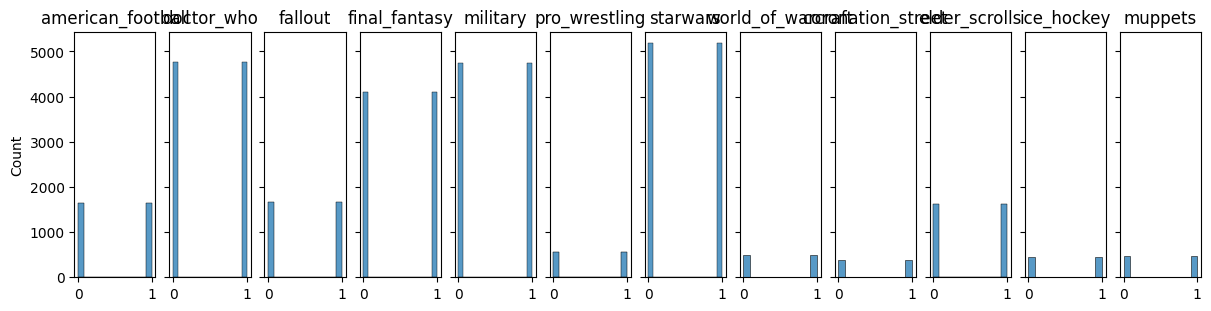

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, len(dfs), figsize=(12,3), layout='constrained', sharey=True)

for i, theme in enumerate(dfs):
    sns.histplot(dfs[theme][1], ax=ax[i])
    ax[i].set_title(theme)

## Modeling

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
import numpy as np
import pickle
import pandas as pd

SEED = 42

In [6]:
# Load full val and test sets
def read_full_ds(themes, split):
    X = []
    y = []
    for theme in themes:
        X.append(np.load(f'datasets/full/{split}_{theme}_X.npy'))
        y.append(np.load(f'datasets/full/{split}_{theme}_y.npy'))

    X = np.concatenate(X, 0)
    y = np.concatenate(y)

    return X, y

In [7]:
X_val, y_val = read_full_ds(val_themes, 'val')
X_test, y_test = read_full_ds(test_themes, 'test')

### Train test split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

### Model fit with Random Search

In [17]:
from modeling import param_search
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [400, 600, 800, 1000],
    'max_depth': [3, 6, 9, 12],
    'min_child_weight': [1, 2, 4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1],
    'colsample_bytree': [0.8, 0.9, 1],
    'gamma': [0, 0.1, 0.5, 1],
    'scale_pos_weight': [1, 2, 3, 4],
    'learning_rate': [0.005, 0.01, 0.05, 0.1]
}

xgb_clf = XGBClassifier(random_state=SEED, objective='binary:logistic', booster='gbtree', tree_method='gpu_hist')
search = param_search(X_train, y_train, xgb_clf, param_grid, n_jobs=5)

/home/dghilardi/mention_clustering/venv/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
from lightgbm import LGBMClassifier

param_grid = {
    'n_estimators': [400, 600, 800, 1000],
    'num_leaves': [30, 50, 60, 90],
    'max_depth': [3, 6, 9, 12],
    'min_child_weight': [1, 2, 4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1],
    'colsample_bytree': [0.8, 0.9, 1],
    'scale_pos_weight': [1, 2, 3, 4],
    'learning_rate': [0.005, 0.01, 0.05, 0.1],
    'reg_lambda': [0.01, 0.1, 1, 10],
    'force_col_wise': [True]
}

# Initialize the classifier
lgb_clf = LGBMClassifier(random_state=SEED, objective='binary', device='gpu')
search = param_search(X_train, y_train, xgb_clf, param_grid, n_jobs=20)

In [19]:
# Best parameters and best score
print(f"Best parameters: {search.best_params_}")
print(f"Best score: {search.best_score_}")

# You can also use the best estimator directly
best_estimator = search.best_estimator_

Best parameters: {'subsample': 0.8, 'scale_pos_weight': 2, 'n_estimators': 800, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.01, 'gamma': 1, 'colsample_bytree': 1}
Best score: 0.9746915596479484


### Saving/Loading the model

In [15]:
factor = 3

# Save
#with open(f'models/zeshel_xgb_{factor}.pkl', 'wb') as file:
#    pickle.dump(best_estimator, file)

# Load

with open(f'models/zeshel_xgb_{factor}.pkl', 'rb') as file:
    zeshel_xgb = pickle.load(file)

### Threshold tuning

In [ ]:
from modeling import theshold_tuning

factors = [2, 4, 8, 16, 32, 64, 128, 256, 512]
thresholds = []

for factor in factors:
    with open(f'models/zeshel_xgb_{factor}.pkl', 'rb') as file:
        model = pickle.load(file)
    model.predictor = 'gpu_predictor'
    model.set_params(n_jobs=-1, predictor='gpu_predictor')
    thresholds.append(theshold_tuning(X_val, y_val, model, inc=0.001, start=0.98, cv=False))

In [ ]:
thresholds

In [11]:
factors = [2, 4, 8, 16, 32, 64, 128, 256, 512]
thresholds = [
    0.999,
    0.999,
    0.999,
    0.999,
    0.999,
    0.999,
    0.999,
    0.999,
    0.999]

#### Testing XGB

In [ ]:
from modeling import evaluate_clf

for i, factor in enumerate(factors):
    print(factor)
    with open(f'models/zeshel_xgb_{factor}.pkl', 'rb') as file:
        model = pickle.load(file)

    evaluate_clf(zeshel_test, "Gold", model, thresholds[i], X=X_val, y=y_val, get_similarities=False)

In [14]:
preds = np.load('predictions.npy')
print(classification_report(preds[:, 0], preds[:, 1], digits=3))

              precision    recall  f1-score   support

           0      1.000     0.920     0.958  16056039
           1      0.002     0.876     0.005      3464

    accuracy                          0.920  16059503
   macro avg      0.501     0.898     0.481  16059503
weighted avg      1.000     0.920     0.958  16059503



In [12]:
# Load cross-encoder predictions
val_pred = np.load("/home/dghilardi/kgqa/mention-clustering/zeshel_datasets/predictions/crossencoder_val_predict.npy")
test_pred = np.load("/home/dghilardi/kgqa/mention-clustering/zeshel_datasets/predictions/crossencoder_test_predict.npy")

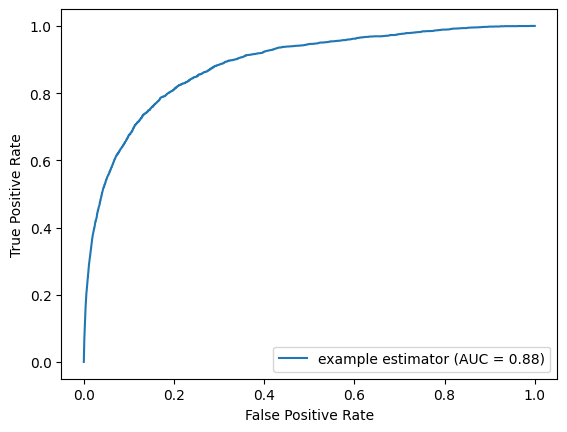

In [21]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(val_pred[:, 1], val_pred[:, 0])
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='example estimator')
display.plot()

In [24]:
f1s = []
for t in np.linspace(0, 1, 100):
    y_pred = (val_pred[:, 0] >= t).astype(np.int32)
    f1s.append(f1_score(val_pred[:, 1], y_pred))

threshold = (np.argmax(f1s) + 1) / 100

In [25]:
print(classification_report(val_pred[:, 1], (val_pred[:, 0] >= threshold).astype(np.int32), digits=3))

              precision    recall  f1-score   support

         0.0      0.977     0.974     0.976     73059
         1.0      0.394     0.418     0.405      2917

    accuracy                          0.953     75976
   macro avg      0.685     0.696     0.690     75976
weighted avg      0.954     0.953     0.954     75976



### Graph-based community algorithm

In [29]:
from utils import import_document, compute_similarity_light, sourface_similarity_light
from pathlib import Path
import pickle
import numpy as np
import itertools
import pandas as pd
from collections import defaultdict
import networkx as nx
from networkx.algorithms.community import asyn_lpa_communities, louvain_communities, partition_quality, is_partition

In [30]:
def graph_clustering(X, n, threshold):
    graph = nx.Graph()

    similarity_matrix = np.identity(n)

    for idx1, idx2, prob, link in X:
        idx1 = int(idx1)
        idx2 = int(idx2)
        if prob >= threshold:
            similarity_matrix[idx1, idx2] = prob
            similarity_matrix[idx2, idx1] = prob
            
        if link:
            graph.add_edge(idx1, idx2, weight=prob)

    # create clusters
    clusters = louvain_communities(graph, resolution=2, seed=SEED)

    # refine clusters
    clusters_refine = []
    for cluster in [list(c) for c in clusters]:
        new_cluster = []
        for idx_target in cluster:
            score = []
            for idx_other in list(set(cluster) - set([idx_target])):
                score.append(similarity_matrix[idx_target, idx_other])
            mean_score = np.array(score).mean()
            if mean_score >= threshold:
                new_cluster.append(idx_target)
        clusters_refine.append(new_cluster)

    # mapping id to cluster
    id2clust = {}
    for c_idx, cluster in enumerate(clusters_refine):
        for ann_idx in cluster:
            id2clust[ann_idx] = c_idx

    return id2clust

In [27]:
def annotate_clustering(gdocs, annset, model, threshold, testing=False):
    
    # Iterate over gdocs to get anns
    anns = []
    gdoc_ids = []
    for i, gdoc in enumerate(gdocs):  
        for ann in gdoc.annset(annset):
            anns.append(ann)
            gdoc_ids.append(i)
    n = len(anns)
    
    # Get the pairs dataset
    X, y, idxs = get_doc_similarities(anns, testing=testing)
    # Fit the model and get proba
    #model.fit(X, y)
    y_proba = model.predict_proba(X)[:, 1]
    y_hat = (y_proba >= threshold).astype(np.int32)
    print(f1_score(y, y_hat, average='macro'))
    # Clustering
    clusters = graph_clustering(np.c_[idxs, y_proba, y_hat], n, threshold)

    # Update gdocs
    for ann_id, (ann, gdoc_id) in enumerate(zip(anns, gdoc_ids)):
        if ann_id in clusters:
            try:
                gdocs[gdoc_id].remove_annset('clustering')
            except: pass
            
            newset = gdocs[gdoc_id].annset('clustering')
            newset.add(ann.start, ann.end, f'CLUST-{clusters[ann_id]}')

In [29]:
def zeshel_clustering(split, annset, model, THRESHOLD, testing=False):
    themes = list(get_corpus_names(split)[1].keys())

    for theme in themes:
        theme_docs = [doc for doc in split if doc.features['corpus'] == theme]
        annotate_clustering(theme_docs, annset, model, THRESHOLD, testing=testing)

In [30]:
zeshel_clustering(zeshel_test, "Gold", zeshel_xgb, THRESHOLD, testing=True)

  0%|          | 0/719400.0 [00:00<?, ?it/s]

0.514381420282863


  0%|          | 0/718201.0 [00:00<?, ?it/s]

0.5201195688050726


  0%|          | 0/8931651.0 [00:00<?, ?it/s]

0.4956066736404184


/tmp/ipykernel_1792140/1165263488.py:27: RuntimeWarning: Mean of empty slice.
  mean_score = np.array(score).mean()
/home/dghilardi/mention_clustering/venv/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


  0%|          | 0/5690251.0 [00:00<?, ?it/s]

0.45382594053704167


/tmp/ipykernel_1792140/1165263488.py:27: RuntimeWarning: Mean of empty slice.
  mean_score = np.array(score).mean()
/home/dghilardi/mention_clustering/venv/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


## Clustering evaluation

In [33]:
from metric4coref import muc, b_cubed, ceaf, conll_coref_f1

In [34]:
def get_clusters(gdocs, annset, with_keys=False):
    clusters = {}
    for gdoc in gdocs:
        for ann in gdoc.annset(annset):
            ent_id = ann.type
            start = ann.start
            end = ann.end
            
            if ent_id not in clusters:
                clusters[ent_id] = []

            clusters[ent_id].append(gdoc.text[start:end])
    
    if not with_keys:
        clusters = list(clusters.values())
    return clusters

def compute_metrics(gdocs, gold, pred):
    pred_clusters = get_clusters(gdocs, pred)
    gold_clusters = get_clusters(gdocs, gold)

    return {
        'muc' : muc(pred_clusters, gold_clusters)[-1],
        'b_cubed' : b_cubed(pred_clusters, gold_clusters)[-1],
        'ceaf' : ceaf(pred_clusters, gold_clusters)[-1],
        'conll_f1' : conll_coref_f1(pred_clusters, gold_clusters)
    }

In [35]:
def zeshel_evaluation(split, gold, pred):
    themes = list(get_corpus_names(split)[1].keys())
    metrics = []
    for theme in themes:
        theme_docs = [doc for doc in split if doc.features['corpus'] == theme]
        metrics.append([theme] + list(compute_metrics(theme_docs, gold, pred).values()))

    return pd.DataFrame(metrics, columns=['Theme', 'MUC', 'B3', 'CEAF', 'CONLL'])

In [42]:
metrics_df = zeshel_evaluation(zeshel_test, "Gold", 'clustering')
metrics_df

,Theme,MUC,B3,CEAF,CONLL
0,forgotten_realms,0.584041,0.589398,0.261189,0.478210
1,lego,0.665511,0.695367,0.315337,0.558739
2,star_trek,0.191878,0.678837,0.290592,0.387102
3,yugioh,0.073226,0.470057,0.207846,0.250376


In [40]:
metrics_df.iloc[:, 1:].mean(0)

MUC      0.378664
B3       0.608415
CEAF     0.268741
CONLL    0.418607
dtype: float64

In [50]:
metrics_df.apply(lambda x: np.round(x*100, 1) if x.dtype == np.float64 else x)

,Theme,MUC,B3,CEAF,CONLL
0,forgotten_realms,58.4,58.9,26.1,47.8
1,lego,66.6,69.5,31.5,55.9
2,star_trek,19.2,67.9,29.1,38.7
3,yugioh,7.3,47.0,20.8,25.0
